In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
#Read dataset
survival = pd.read_csv('survival_data.csv', sep=',', header=None, names=['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes', 'Survival_Status'])

In [3]:
print type(survival)

<class 'pandas.core.frame.DataFrame'>


In [4]:
#Determine data types for each feature
survival.dtypes

Patient_Age          int64
Year_of_Operation    int64
Number_of_Nodes      int64
Survival_Status      int64
dtype: object

In [5]:
#Dataset dimensions
print survival.shape

(306, 4)


In [6]:
#Check column names
survival.columns

Index([u'Patient_Age', u'Year_of_Operation', u'Number_of_Nodes',
       u'Survival_Status'],
      dtype='object')

In [7]:
#Print dataset
print(survival)

     Patient_Age  Year_of_Operation  Number_of_Nodes  Survival_Status
0             30                 64                1                1
1             30                 62                3                1
2             30                 65                0                1
3             31                 59                2                1
4             31                 65                4                1
5             33                 58               10                1
6             33                 60                0                1
7             34                 59                0                2
8             34                 66                9                2
9             34                 58               30                1
10            34                 60                1                1
11            34                 61               10                1
12            34                 67                7                1
13            34    

In [8]:
#Summary of dataset
print("Number of rows: " + str(survival.shape[0]))
print("Number of columns: " + str(survival.shape[1]))
print("Columns Names: " + ", ".join(survival.columns))
print
print("Number of target variables")
print(survival.iloc[:,-1].value_counts())
print
print("Proportion of target variables")
print(survival.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of columns: 4
Columns Names: Patient_Age, Year_of_Operation, Number_of_Nodes, Survival_Status

Number of target variables
1    225
2     81
Name: Survival_Status, dtype: int64

Proportion of target variables
1    0.735294
2    0.264706
Name: Survival_Status, dtype: float64


In [9]:
#Generate frequency table for Survival Status 
#1 = the patient survived 5 years or longer, 2 = the patient died within 5 year
survival['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [10]:
survival.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
#Check for missing values in the dataset
survival.isnull().values.any()

False

In [12]:
#Summary statistics for patients that have survived 5 years or longer
survive = survival[survival['Survival_Status'] == 1]
survive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [13]:
#Summary statistics for patients that have died within 5 year
nonSurvive = survival[survival['Survival_Status'] == 2]
nonSurvive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [14]:
#Load python packages
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy

<function matplotlib.pyplot.show>

C:\Users\Charles\Anaconda2\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


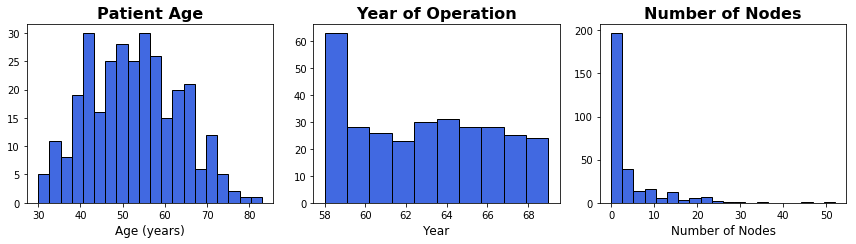

In [15]:
#Histogram examining the distribution of Patient Ages, Year of Operation and Number of Positive Axillary Nodes Detected

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5), tight_layout=True)
ax0.hist(x=survival['Patient_Age'], bins=20, histtype='bar', edgecolor='black', color='royalblue')
ax0.set_title('Patient Age', fontsize=16, fontweight = 'bold')
ax0.set_xlabel('Age (years)', fontsize = 12)

ax1.hist(x=survival['Year_of_Operation'], bins=10, histtype='bar', edgecolor='black', color='royalblue')
ax1.set_title('Year of Operation', fontsize=16, fontweight = 'bold')
ax1.set_xlabel('Year', fontsize = 12)

ax2.hist(x=survival['Number_of_Nodes'], bins=20, histtype='bar', edgecolor='black', color='royalblue')
ax2.set_title('Number of Nodes', fontsize=16, fontweight = 'bold')
ax2.set_xlabel('Number of Nodes', fontsize = 12)

plt.show

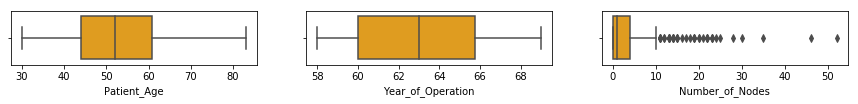

In [16]:
#Box plots examining the distribution of Patient Ages, Year of Operation and Number of Positive Axillary Nodes Detected

fig, axes = plt.subplots(1, 3, figsize=(15, 1))
for idx, feature in enumerate(list(survival.columns)[:-1]):
    sns.boxplot( x=feature, data=survival, ax=axes[idx], color='orange')
plt.show()    

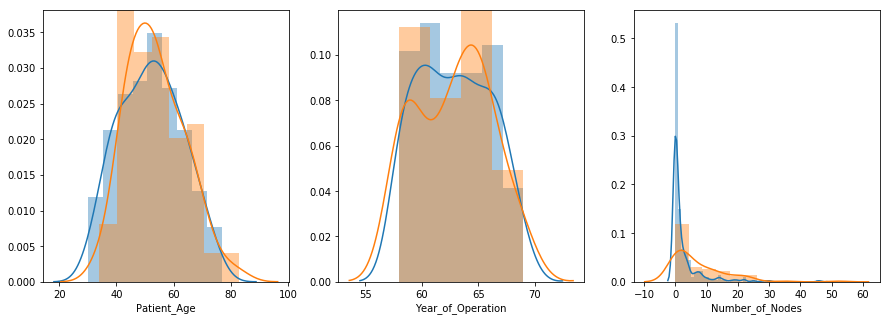

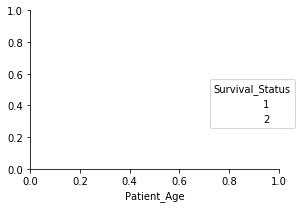

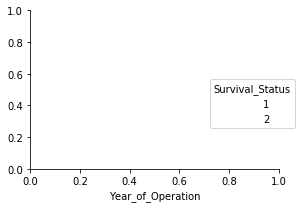

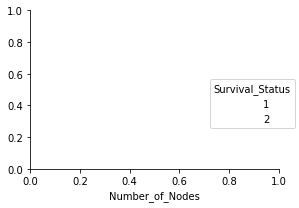

In [17]:
#Distribution and Probability Density Function plots of untransformed versus cube root transformed 
#Number of Nodes grouped by survival
    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.FacetGrid(survival, hue = "Survival_Status").add_legend().map(sns.distplot, "Patient_Age", ax = axes[0])
sns.FacetGrid(survival, hue = "Survival_Status").add_legend().map(sns.distplot, "Year_of_Operation", ax = axes[1])
sns.FacetGrid(survival, hue = "Survival_Status").add_legend().map(sns.distplot, "Number_of_Nodes", ax = axes[2])
plt.show()


survival['Year_of_Operation'].plot.hist(histtype='bar', bins=10, edgecolor='black', color='royalblue', normed = True)
plt.title('Year of Operation', fontsize=20, fontweight = 'bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.show()

In [18]:
survival2 = survival.copy()

f = lambda x: np.sign(x) * np.power(abs(x), 1./3)
survival2[['Number_of_Nodes']] = f(survival2[['Number_of_Nodes']])
print survival2

     Patient_Age  Year_of_Operation  Number_of_Nodes  Survival_Status
0             30                 64         1.000000                1
1             30                 62         1.442250                1
2             30                 65         0.000000                1
3             31                 59         1.259921                1
4             31                 65         1.587401                1
5             33                 58         2.154435                1
6             33                 60         0.000000                1
7             34                 59         0.000000                2
8             34                 66         2.080084                2
9             34                 58         3.107233                1
10            34                 60         1.000000                1
11            34                 61         2.154435                1
12            34                 67         1.912931                1
13            34    

<function matplotlib.pyplot.show>

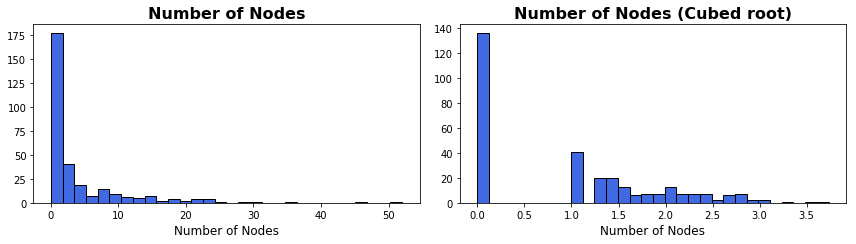

In [19]:
#Compare histograms of original and cube root transformed Number of Nodes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.5), tight_layout=True)
ax0.hist(x=survival['Number_of_Nodes'], bins=30, histtype='bar', edgecolor='black', color='royalblue')
ax0.set_title('Number of Nodes', fontsize=16, fontweight = 'bold')
ax0.set_xlabel('Number of Nodes', fontsize = 12)

ax1.hist(x=survival2['Number_of_Nodes'], bins=30, histtype='bar', edgecolor='black', color='royalblue')
ax1.set_title('Number of Nodes (Cubed root)', fontsize=16, fontweight = 'bold')
ax1.set_xlabel('Number of Nodes', fontsize = 12)

plt.show

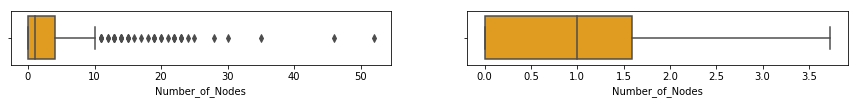

In [20]:
#Box plot examining the distribution of the cubed root of the Number of Positive Axillary Nodes Detected

fig, axes = plt.subplots(1, 2, figsize=(15, 1))
sns.boxplot(x='Number_of_Nodes', data=survival, ax = axes[0], color = 'orange') 
sns.boxplot(x='Number_of_Nodes', data=survival2, ax = axes[1], color = 'orange') 
plt.show()  

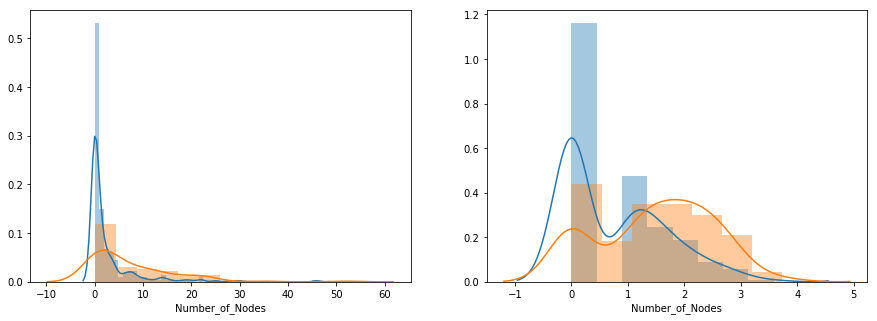

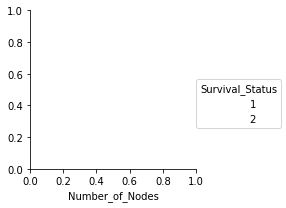

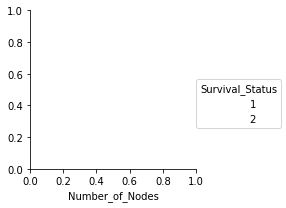

In [21]:
#Distribution and Probability Density Function plots of untransformed versus cube root transformed 
#Number of Nodes grouped by survival

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.FacetGrid(survival, hue = "Survival_Status").map(sns.distplot, "Number_of_Nodes", ax = axes[0]).add_legend()
sns.FacetGrid(survival2, hue = "Survival_Status").map(sns.distplot, "Number_of_Nodes", ax = axes[1]).add_legend()
plt.show()

In [22]:
survival.cov()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
Patient_Age,116.714583,3.142912,-4.907082,0.324397
Year_of_Operation,3.142912,10.558631,-0.087946,-0.006847
Number_of_Nodes,-4.907082,-0.087946,51.691118,0.911090
Survival_Status,0.324397,-0.006847,0.911090,0.195275


In [23]:
survival.corr()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
Patient_Age,1.000000,0.089529,-0.063176,0.067950
Year_of_Operation,0.089529,1.000000,-0.003764,-0.004768
Number_of_Nodes,-0.063176,-0.003764,1.000000,0.286768
Survival_Status,0.067950,-0.004768,0.286768,1.000000


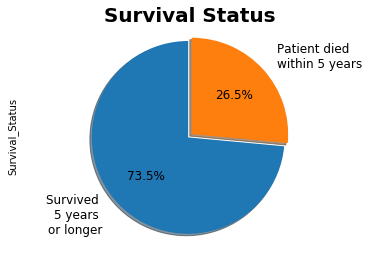

In [24]:
labels = 'Survived \n5 years \nor longer', 'Patient died \nwithin 5 years'
explode = (0, 0.05)
ax1 = survival['Survival_Status'].value_counts().plot(kind='pie', labeldistance = 1.2, autopct='%1.1f%%', explode = explode, startangle=90, labels=labels, shadow=True, fontsize=12)
ax1.axis('equal')
ax1.set_title('Survival Status', fontsize=20, fontweight = 'bold')
plt.show()

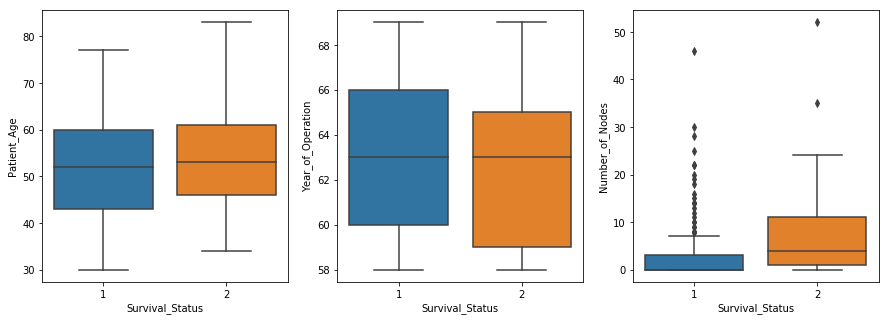

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(survival.columns)[:-1]):
    sns.boxplot( x='Survival_Status', y=feature, data=survival, ax=axes[idx])
plt.show()

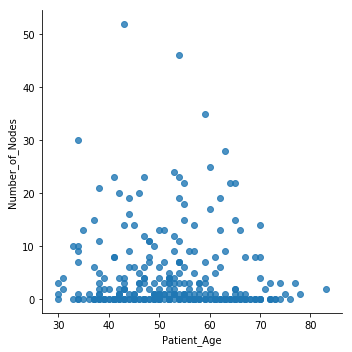

In [26]:
sns.lmplot(fit_reg = False, data = survival, y = 'Number_of_Nodes', x = 'Patient_Age')

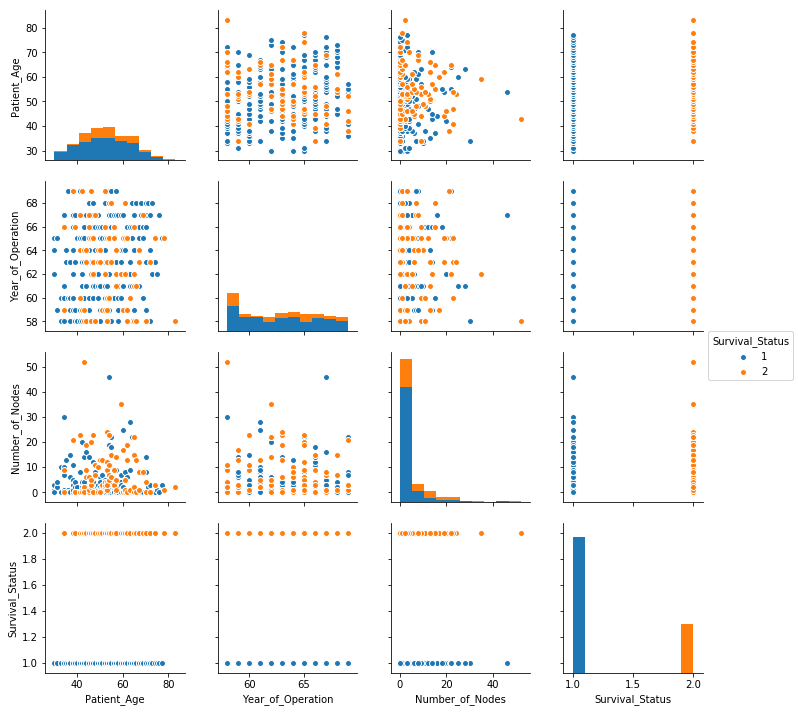

In [27]:
sns.pairplot(survival, hue = 'Survival_Status')

In [28]:
print("Mean age of patients surviving longer than 5 years:", round(np.mean(survival[survival['Survival_Status'] == 1]['Patient_Age'])))
print("Mean age of patients surviving less than 5 years:", round(np.mean(survival[survival['Survival_Status'] == 2]['Patient_Age'])))

('Mean age of patients surviving longer than 5 years:', 52.0)
('Mean age of patients surviving less than 5 years:', 54.0)


In [29]:
survive = survival[survival['Survival_Status'] == 1]
survive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [30]:
nonSurvive = survival[survival['Survival_Status'] == 2]
nonSurvive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


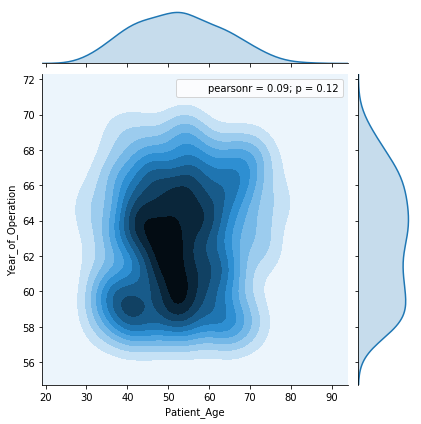

In [31]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Year_of_Operation', data = survival)
plt.show()

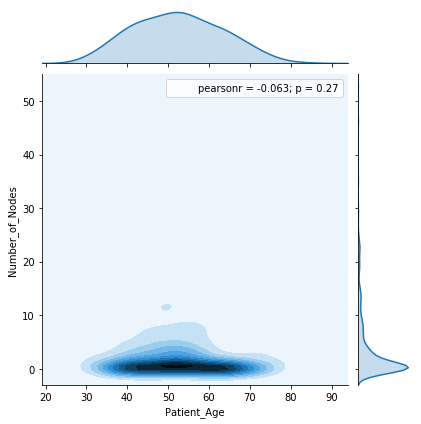

In [32]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Number_of_Nodes', data = survival)
plt.show()

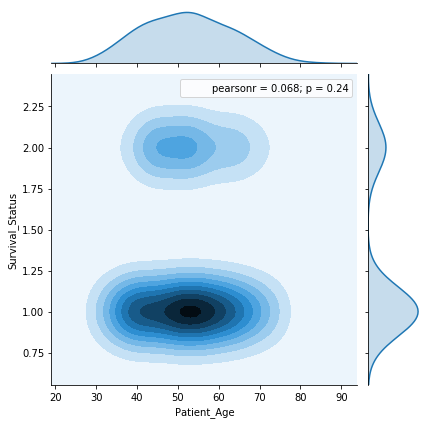

In [33]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Survival_Status', data = survival)
plt.show()

In [34]:
#K Nearest Neighbors Classifier
array = survival.as_matrix()
survival.data = array[:,:3]
survival.target = array[:,3]


C:\Users\Charles\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Charles\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [35]:
print survival.data

[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45

In [36]:
print survival.target.shape

(306L,)


In [37]:
survival.feature_names = ['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']
print survival.feature_names

['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']


C:\Users\Charles\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [38]:
print survival.target

[1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 2 2]


In [39]:
survival.target_name = ['Survival_Status']
print survival.target_name

['Survival_Status']


C:\Users\Charles\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
print x_train

NameError: name 'x_train' is not defined

In [ ]:
x_train.shape

In [ ]:
y_train

In [ ]:
y_train.shape

In [ ]:
x_test

In [ ]:
x_test.shape

In [ ]:
y_test

In [ ]:
y_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(7)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
predicted = clf.predict(x_test)

In [ ]:
predicted

In [ ]:
predicted.shape

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, predicted)
print cm

In [ ]:
# K-fold cross-validation
print "[Train/test split] score: {:.5f}".format(clf.score(x_test, y_test))

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5, random_state = 4)

In [ ]:
for train_index, test_index in kf.split(survival.data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = survival.data[train_index], survival.data[test_index]
    y_train, y_test = survival.target[train_index], survival.target[test_index]

In [ ]:
for k, (train_index, test_index) in enumerate(kf.split(survival.data)):
    
    x_train, x_test = survival.data[train_index], survival.data[test_index]
    y_train, y_test = survival.target[train_index], survival.target[test_index]
    
    clf.fit(x_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, clf.score(x_test, y_test))